In [1]:
using PyPlot, LinearAlgebra, FFTW

In [3]:
# Show interpolation via sparse inversion
# S: Sampling operator 
# F: Fourier DFT operator in explicit matrix form
# m: Desired signal
# d_obs: Observed data
# a: Fourier coefficients that synthetize the data

# Compute a that minimizes J = || S F a - d_obs||_2^2 + mu ||a||_1
# Then predict interpolated data d_pred = F a
# F = equivalent to iDFT or iFFT (goes from coefs to data)


# Make a signal for testing 

 M = 512
 x = collect(0:1:M-1)
 m  = cos.(2*pi*0.141*x.+0.1) + cos.(2*pi*0.021*x.+0.3)+cos.(2*pi*0.031*x.+0.3).+0.1*randn(M)
 h  = 0.54.-0.46.*cos.(2*pi*x/M)

 m  = m.*h       # True signal


S=Diagonal(ones(Float64,M))

S[:,5:10].=0.
S[:,15:17].=0.
S[:,25:59].=0.
S[:,125:199].=0.

d_obs = S*m     # Observed data is the sampled data m (you want to get back m from obs) 

# The Fourier Operator in matrix form 

k = (0:1:M-1)*2*pi/M
F = exp.(im*x*k')

# Final operator 

L = S*F                    # This is the linear operator to invert 

mu = 10.

# Start IRLS 

a = L'*d_obs

for k=1:10
    q = 1.0./(abs.(a).+0.001)
    Q = Diagonal(q)
    a = (L'*L+mu*Q)\(L'*d_obs)
end
  d_pred = real.(F*a);     # Sythesis of predicted data from Fourier coefs. 



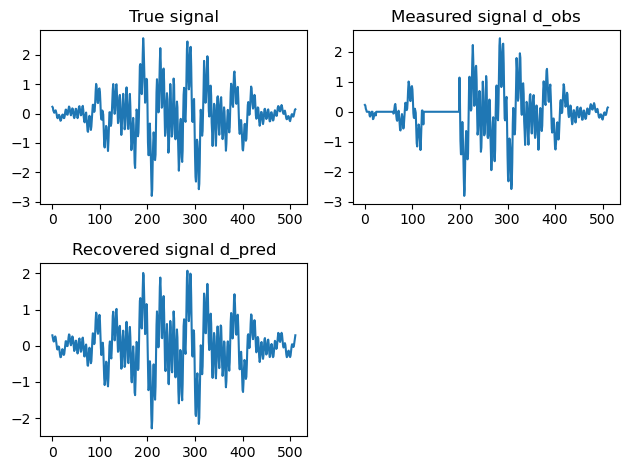

In [4]:
subplot(221); plot(m); title("True signal")
subplot(222); plot(d_obs); title("Measured signal d_obs")
subplot(223); plot(d_pred); title("Recovered signal d_pred")
tight_layout()
savefig("./figs/1d_reconstruction_explicit.png")

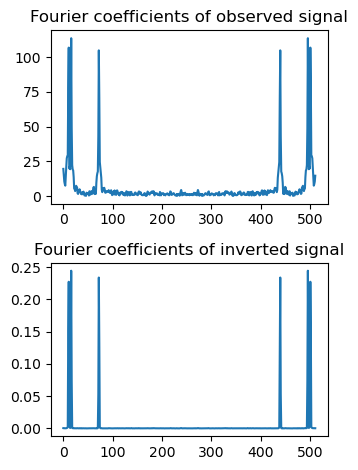

In [6]:
subplot(221);plot(abs.(F'*d_obs));title("Fourier coefficients of observed signal")
subplot(223);plot(abs.(a));title("Fourier coefficients of inverted signal")
tight_layout()
savefig("./figs/1d_reconstruction_explicit_spectra.png")